## This notebook is to demonstrate classification using the following datasets:
- ## Iris
- ## Moons
- ## Wine


## Author: Dr. Ruba Alomari

In [1]:
#load libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
#disable all warnings
warnings.filterwarnings("ignore")
#enable warnings again (optional)
#warnings.filterwarnings("default")

# iris Classification 
Multilabel classification

Read about the iris dataset available at  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [2]:
#to load the dataset you could use load_iris function as per the code below:
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True, as_frame=True)


#or you could  load it from uci repository:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_df = pd.read_csv(url, names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

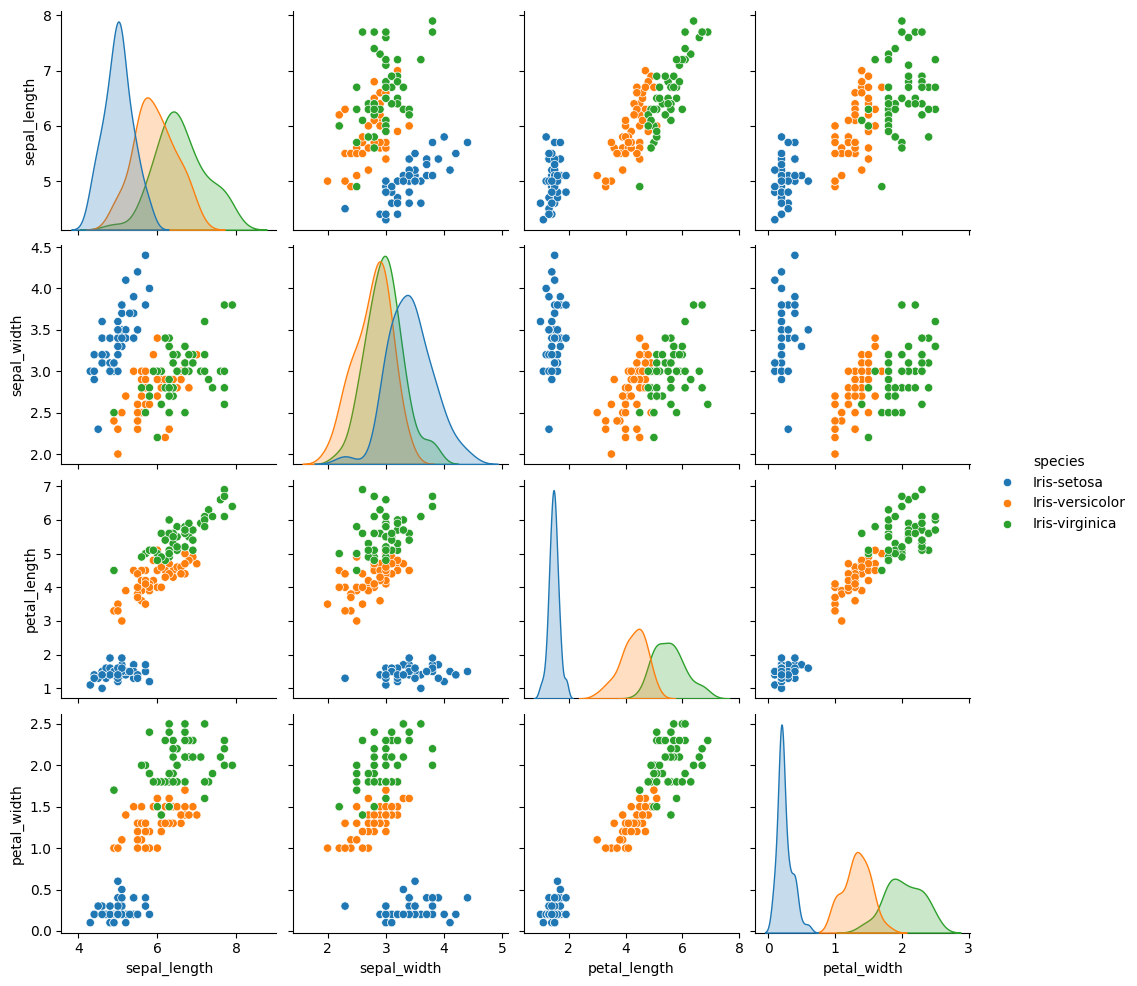

In [3]:
#use seaborn to pairplot, use the hue parameter to color the data points based on the species categorical variable. 

sns.pairplot(iris_df, hue="species")

In [4]:
#calculate the correlation matrix. 
#Tip: If you set numeric_only=False, pandas will attempt to compute correlations for all columns regardless of their data types. 
#However, if any non-numeric columns are present, pandas will raise a TypeError because it cannot compute correlations for non-numeric data types.

corr_matrix = iris_df.corr(numeric_only=True)
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [5]:
#let's quickly encode our target to check for correlations using a label encoder.
from sklearn.preprocessing import LabelEncoder

#creating instance of a label encoder
encode = LabelEncoder()

#assigning numerical values and storing in the same name column 'species'
iris_df.species = encode.fit_transform(iris_df.species)


In [6]:
corr_matrix = iris_df.corr(numeric_only=True)
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [7]:
#split the data into 80% training set and 20% testing set.

from sklearn.model_selection import train_test_split

X = iris_df.drop('species', axis=1)
y = iris_df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 4) (120,) (30, 4) (30,)


# SVM Classifier - SVC - Default Hyperparameters

In [8]:
#Train a Support Vector Machine Classifier (SVC) to predict the species of the iris
from sklearn.svm import SVC

poly_kernel_svm_clf = SVC()
poly_kernel_svm_clf.fit(X_train, y_train)

SVC()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_predict = poly_kernel_svm_clf.predict(X_test)
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Performance Metrics

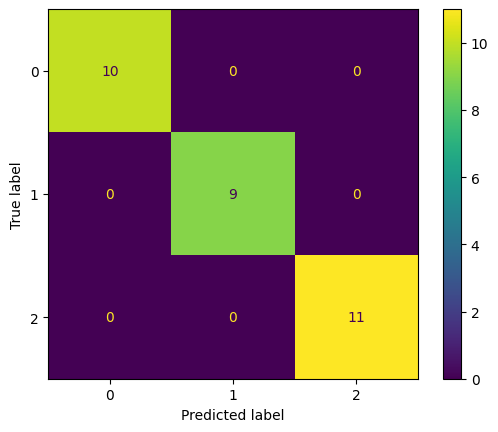

In [10]:
#Plot Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

# Make Moons
# Nonlinear Dataset - SVM Classification 

In [11]:
#make moons

from sklearn.datasets import make_moons
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


X, y = moons = make_moons(n_samples=100, shuffle=True, noise=0.10, random_state=42)
#X, y = moons = make_moons(n_samples=100, shuffle=True, noise=0.40, random_state=42)

In [12]:
X.shape

(100, 2)

In [12]:
#split the dataset into 80% training set and 20% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 2) (80,) (20, 2) (20,)


In [13]:
#plot the moons dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

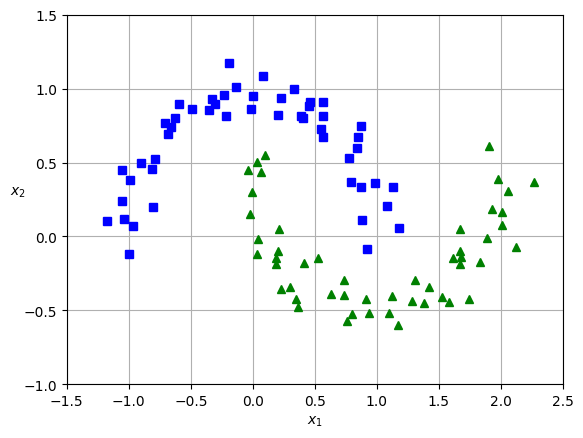

In [14]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# 1- Use a LinearSVC and Add Polynomial Features

In [15]:
#Nonlinear SVM Classification

from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, random_state=42))])

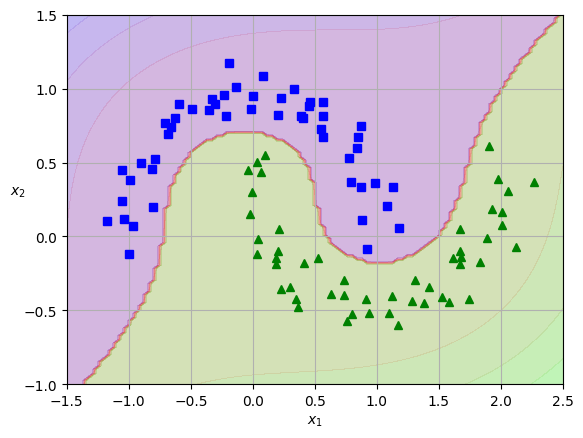

In [16]:
#Plot prediction decision boundary

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

# 2- Use a Polynomial Kernel

In [17]:
poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, C=1)
)

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='poly'))])

In [18]:
poly10_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, C=1)
)
poly10_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, degree=10, kernel='poly'))])

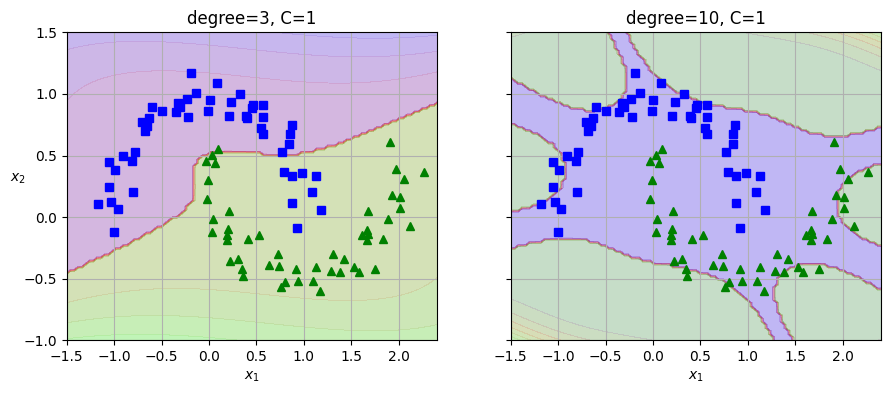

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, C=1")

plt.sca(axes[1])
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, C=1")
plt.ylabel("")


plt.show()

# Wine Quality Classification

Use wine quality dataset available at https://archive.ics.uci.edu/ml/datasets/wine+quality. We will use the winequality-red.csv file available at https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [20]:
#load libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#load the dataset

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
#df = pd.read_csv("datasets/wine/winequality-white-red.csv", sep=',')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df=pd.read_csv(url, sep=';')


1-Take a Quick Look at the Data Structure using head, info, and describe.

In [22]:
#Use head, info and describe

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


2-Print the wine quality correlation matrix with the other attributes.

In [25]:
corr_matrix = wine_df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

3-Find the value count of the  quality attribute

In [26]:
wine_df['quality'].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

4- Split the data into 80% training set and 20% testing set, and print the shape of  X_train, y_train, X_test, and y_test.

In [27]:
#split the data into training and testing

from sklearn.model_selection import train_test_split

X = wine_df.drop("quality", axis=1)
y = wine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1279, 11) (1279,) (320, 11) (320,)


5- Train a svm model to predict the quality of wine on the training set using: kernel = rbf, gamma = 1, and C =1.

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

clf = SVC(kernel='rbf', C=1, gamma=1)
clf.fit(X_train, y_train)

SVC(C=1, gamma=1)

6-Test your model on the test set, and report the classification_report.

In [29]:
y_predict=clf.predict(X_test)
print(f'classification_report for C = 1')
print (classification_report(y_test, y_predict))

classification_report for C = 1
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.49      0.87      0.63       130
           6       0.53      0.31      0.39       132
           7       1.00      0.29      0.44        42
           8       0.00      0.00      0.00         5

    accuracy                           0.52       320
   macro avg       0.34      0.24      0.24       320
weighted avg       0.55      0.52      0.47       320



7- Plot the confusion matrix of your test results 

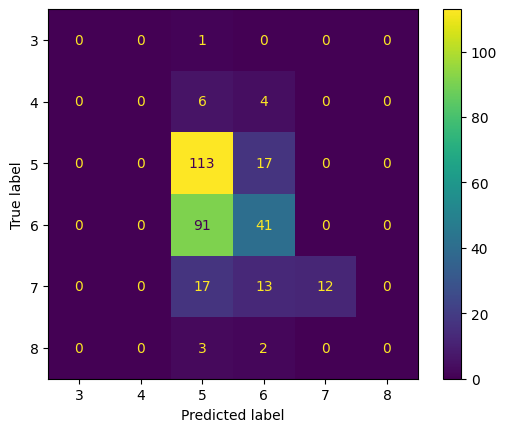

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

8- Evaluate clf using cross validation with cv=5. Report on the cross_val_score, and the mean of the accuracy scores.

In [31]:
from sklearn.model_selection import cross_val_predict, cross_val_score

clf = SVC(kernel='rbf', C=1, gamma=1)
svm_scores = cross_val_score(clf, X_train, y_train, cv=5)
svm_scores

array([0.56640625, 0.56640625, 0.5703125 , 0.58203125, 0.57647059])

In [32]:
print(f'Cross-Validation Mean Accuracy: {svm_scores.mean()}')

Cross-Validation Mean Accuracy: 0.5723253676470588


9-Use GridSearchCV to find the best value of kernel, gamma, and C.

In [33]:
# code author luisguiserrano 

from sklearn.model_selection import GridSearchCV

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
#svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
svm_gs.fit(X_train, y_train)

svm_winner = svm_gs.best_estimator_
svm_winner.score(X_test, y_test)


0.51875

In [34]:
svm_winner

SVC(C=1, gamma=1)